In [1]:
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import numpy as np

data = np.load('C:/Users/User/Desktop/AI_04_05_Explainable_AI_CAM_GradCAM/Code_Mnist/mnist.npz')




In [3]:
print(data.files)

['x_test', 'x_train', 'y_train', 'y_test']


In [4]:
x_test_image = data['x_test']
x_train_image = data['x_train']
y_test_label = data['y_test']
y_train_label = data['y_train']
print(x_train_image.shape)
print(y_train_label.shape)
print(x_test_image.shape)
print(y_test_label.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


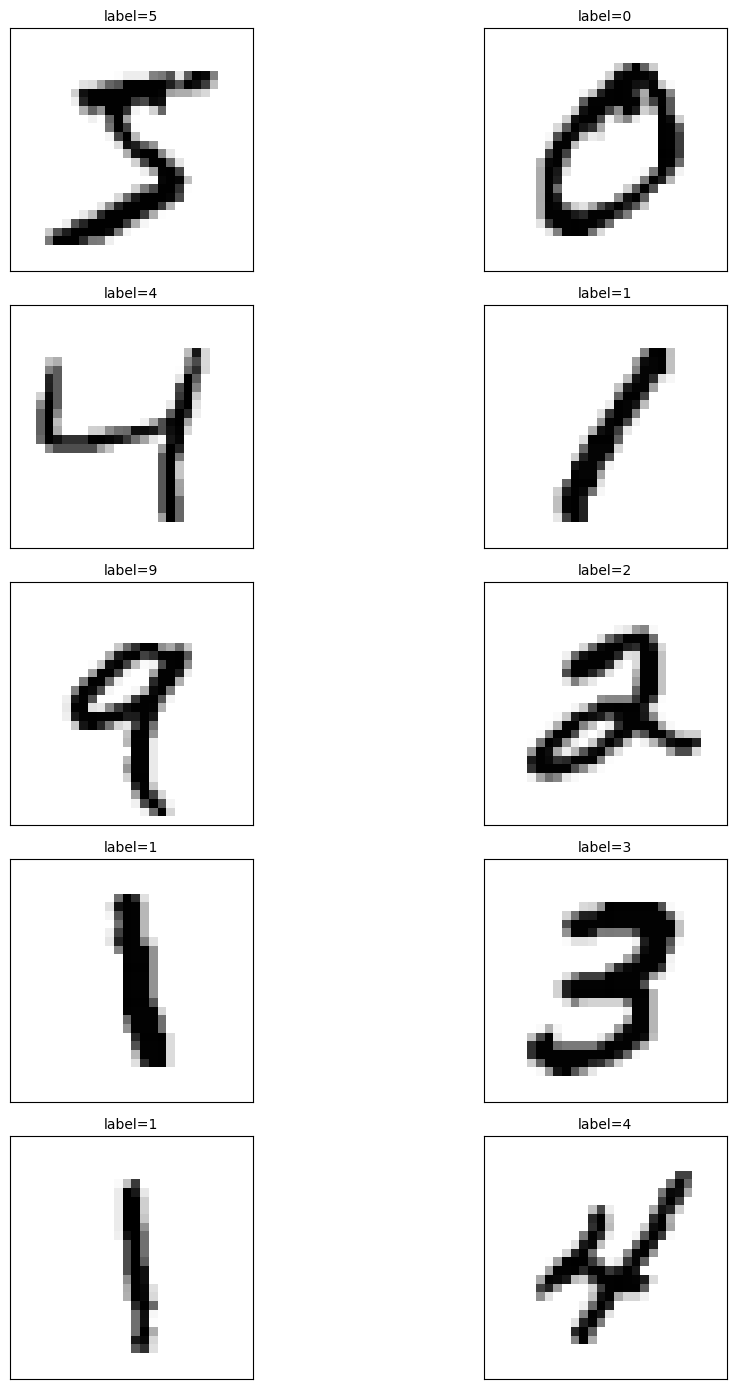

In [5]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(12, 14))
axs = axs.ravel()  # 将10个子图展平成一维数组

for i in range(0, 10):
    axs[i].imshow(x_train_image[i], cmap='binary')
    title = "label=" + str(y_train_label[i])
    axs[i].set_title(title, fontsize=10)
    axs[i].set_xticks([])
    axs[i].set_yticks([])

plt.tight_layout()  # 自动调整子图之间的间距
plt.show()


In [6]:

# 将图像数据转换为四维数组并转换数据类型
x_Train4D = x_train_image.reshape(x_train_image.shape[0], 28, 28, 1).astype('float32')
x_Test4D = x_test_image.reshape(x_test_image.shape[0], 28, 28, 1).astype('float32')


In [7]:
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255
print(x_Train4D_normalize.shape)
print(x_Test4D_normalize.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [8]:
y_TrainOneHot = np_utils.to_categorical(y_train_label)
y_TestOneHot = np_utils.to_categorical(y_test_label)
print(y_TrainOneHot.shape)
print(y_TestOneHot.shape)

(60000, 10)
(10000, 10)


In [9]:
from keras import Model
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,GlobalAveragePooling2D

In [10]:
model = Sequential()

# 添加第一个卷积层
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='same', input_shape=(28,28,1), activation='relu'))


# 添加第二个卷积层
model.add(Conv2D(filters=36, kernel_size=(5,5), padding='same', activation='relu'))

# 添加全局平均池化层
model.add(GlobalAveragePooling2D())

# 添加全连接层
model.add(Dense(10, activation='softmax'))

# 打印模型的结构
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        416       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 36)        14436     
                                                                 
 global_average_pooling2d (G  (None, 36)               0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 10)                370       
                                                                 
Total params: 15,222
Trainable params: 15,222
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 训练模型
model.fit(x_Train4D_normalize, y_TrainOneHot, validation_data=(x_Test4D_normalize, y_TestOneHot), epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 73s 152ms/step - loss: 1.6887 - accuracy: 0.4144 - val_loss: 1.2616 - val_accuracy: 0.6350
Epoch 2/10
469/469 [==============================] - 76s 162ms/step - loss: 1.0727 - accuracy: 0.6935 - val_loss: 0.8472 - val_accuracy: 0.7654
Epoch 3/10
469/469 [==============================] - 74s 157ms/step - loss: 0.7594 - accuracy: 0.7923 - val_loss: 0.6319 - val_accuracy: 0.8258
Epoch 4/10
469/469 [==============================] - 70s 149ms/step - loss: 0.5897 - accuracy: 0.8387 - val_loss: 0.4851 - val_accuracy: 0.8651
Epoch 5/10
469/469 [==============================] - 74s 158ms/step - loss: 0.4889 - accuracy: 0.8638 - val_loss: 0.4113 - val_accuracy: 0.8863
Epoch 6/10
469/469 [==============================] - 74s 159ms/step - loss: 0.4231 - accuracy: 0.8817 - val_loss: 0.3589 - val_accuracy: 0.8983
Epoch 7/10
469/469 [==============================] - 65s 139ms/step - loss: 0.3800 - accuracy: 0.8932 - val_loss: 0.3152 - val_ac

In [12]:
# 获取模型中的所有层
layers = model.layers

# 输出每一层的名称和类型
for layer in layers:
    print(layer.name, layer.__class__.__name__)


conv2d Conv2D
conv2d_1 Conv2D
global_average_pooling2d GlobalAveragePooling2D
dense Dense


In [13]:
# 选择输入数据
input_index = 7
x_input1 = x_Train4D_normalize[input_index,:,:]
x_input2 = np.reshape(x_input1,(1,28,28,1))

# 对输入数据进行预测
prediction = model.predict(x_input2)

# 输出预测结果
print('实际标签为：', y_train_label[input_index])
print('模型预测结果为：', np.argmax(prediction))


1/1 [==============================] - 0s 126ms/step
实际标签为： 3
模型预测结果为： 3


In [14]:
model_output = model.get_layer("dense").output
m = Model(inputs=model.input, outputs=model_output)
print(m.predict(x_input2))
print(m.predict(x_input2).shape)
output_dense = m.predict(x_input2)[0,:]
print(output_dense)
inference_number = pd.Series(output_dense).idxmax()
print(inference_number)

1/1 [==============================] - 0s 68ms/step
[[6.7109568e-10 6.7211651e-14 9.0913056e-07 9.9890864e-01 1.8018424e-10
  7.5448356e-06 9.9281240e-14 8.3577109e-04 3.1579320e-06 2.4396651e-04]]
1/1 [==============================] - 0s 28ms/step
(1, 10)
1/1 [==============================] - 0s 22ms/step
[6.7109568e-10 6.7211651e-14 9.0913056e-07 9.9890864e-01 1.8018424e-10
 7.5448356e-06 9.9281240e-14 8.3577109e-04 3.1579320e-06 2.4396651e-04]
3


1/1 [==============================] - 0s 56ms/step
(1, 28, 28, 36)


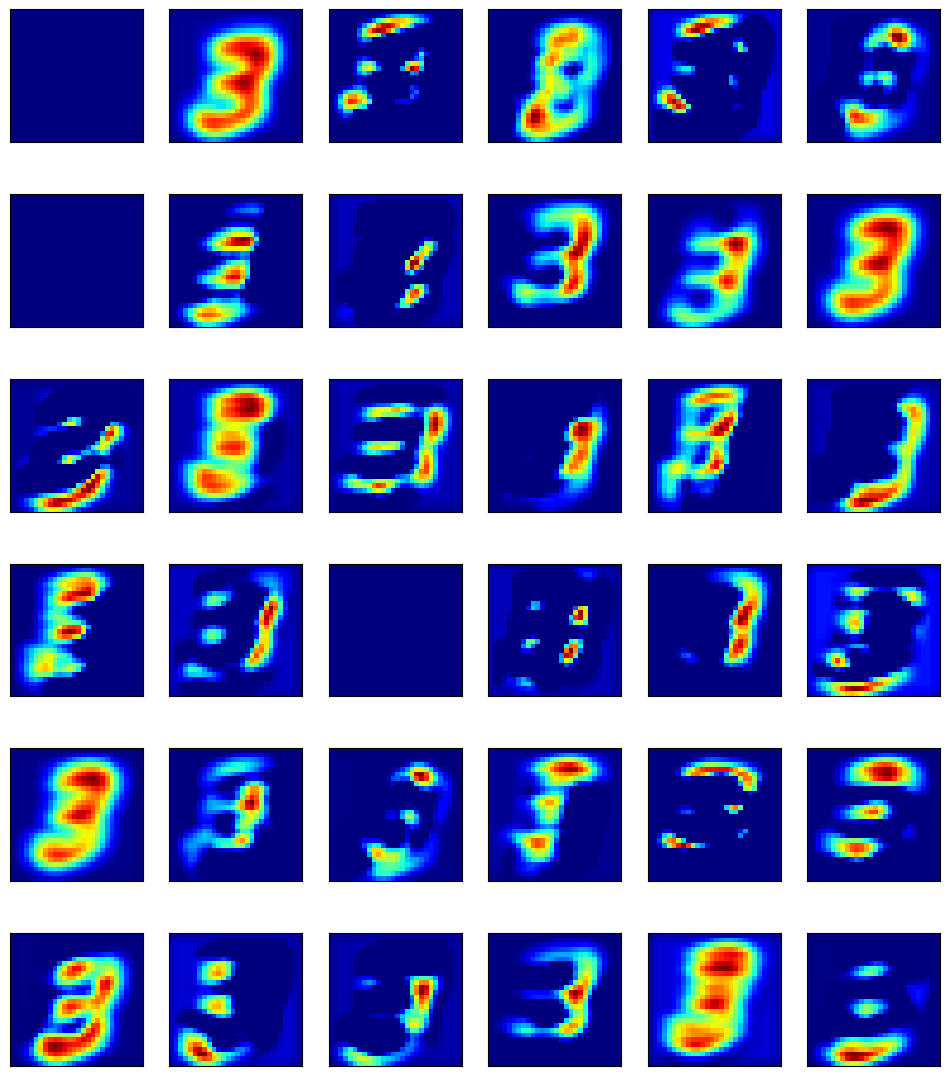

In [15]:
import cv2
model_output = model.get_layer("conv2d_1").output
m = Model(inputs=model.input, outputs=model_output)
output_conv2d_1 = m.predict(x_input2)
print(output_conv2d_1.shape)
output_conv2d_1_np = np.reshape(output_conv2d_1,(28,28,36))

fig = plt.gcf()
fig.set_size_inches(12,14)

for i in range(0,36):
    ax=plt.subplot(6,6,1+i)
    tmp1 = output_conv2d_1_np[:,:,i]
    tmp3 = cv2.resize(tmp1, (28,28), interpolation=cv2.INTER_AREA)
    ax.imshow(tmp3, cmap='jet')
    ax.set_xticks([]);ax.set_yticks([])
plt.show()

In [16]:
print(model.layers[1].name)


conv2d_1


In [17]:
wb_conv2d_1 = np.array(model.layers[1].get_weights())

C:\Users\User\AppData\Local\Temp\ipykernel_3584\705667717.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  wb_conv2d_1 = np.array(model.layers[1].get_weights())


In [18]:
print(wb_conv2d_1[0].shape)

(5, 5, 16, 36)


In [19]:
print(wb_conv2d_1[1].shape)

(36,)


In [20]:
print(model.layers[2].name)
print(model.layers[2].get_weights())

global_average_pooling2d
[]


In [21]:
print(model.layers[3].name)
wb_dense = np.array(model.layers[3].get_weights())
print(wb_dense[0].shape) # w numbers, 36x10 = 360
print(wb_dense[1].shape) # b numbers, 10 and 10 + 360 = 370
print(wb_dense[0][:,inference_number]) # w numbers, 36x1 = 36
print(wb_dense[1][inference_number]) # b numbers, 1 and 1 + 36 = 37

dense
(36, 10)
(10,)
[ 0.1346188  -0.04301713 -0.9569981   0.0273509  -0.74651194 -0.1008919
  0.07897869  0.51239204 -1.0348406  -0.2402847  -0.01634364  0.27422404
  0.2608492   0.23283169  0.53424037  0.49994913 -0.3892733   0.07543939
  0.7815198   0.37399715 -0.08549692 -0.7789313   0.82652533  0.45036212
  0.43142816 -0.3399584  -0.00551894  0.22013542 -0.63146603 -0.4340711
 -0.29044884  0.3808101  -0.8916407  -0.2940911  -0.22626066 -0.51767486]
-0.07632271


C:\Users\User\AppData\Local\Temp\ipykernel_3584\376398861.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  wb_dense = np.array(model.layers[3].get_weights())


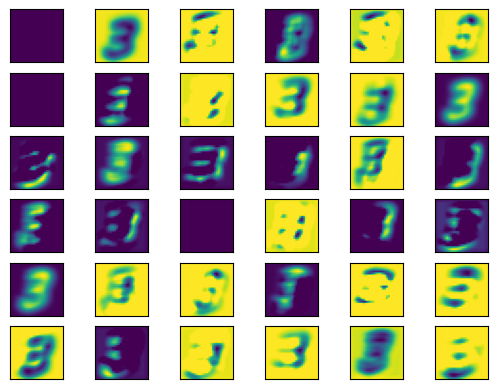

In [51]:
heat_map = np.zeros((28,28))
for i in range(0,36):
    ax=plt.subplot(6,6,1+i)
    tmp1 = output_conv2d_1_np[:,:,i]
    tmp2 = np.reshape(tmp1,(28,28))
    tmp3 = cv2.resize(tmp2, (28,28), interpolation=cv2.INTER_AREA)
    tmp4 = wb_dense[0][i,inference_number] * tmp3
    heat_map[:,:] = heat_map[:,:] + tmp4[:,:]
    ax.imshow(tmp4, cmap='viridis')
    ax.set_xticks([]);ax.set_yticks([])
plt.show()

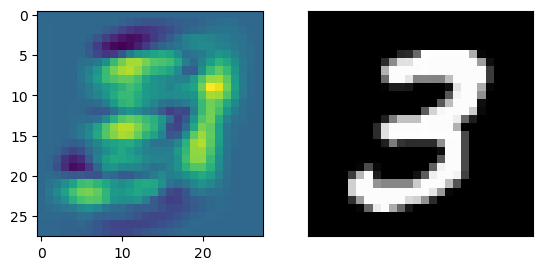

In [52]:
ax=plt.subplot(1,2,1)
ax.imshow(heat_map, cmap='viridis')
x_tmp = np.reshape(x_input1,(28,28))
ax=plt.subplot(1,2,2)
ax.imshow(x_tmp,cmap='gray')
ax.set_xticks([]);ax.set_yticks([])
plt.show()

SSIM index between heat_map and x_tmp: 0.1746


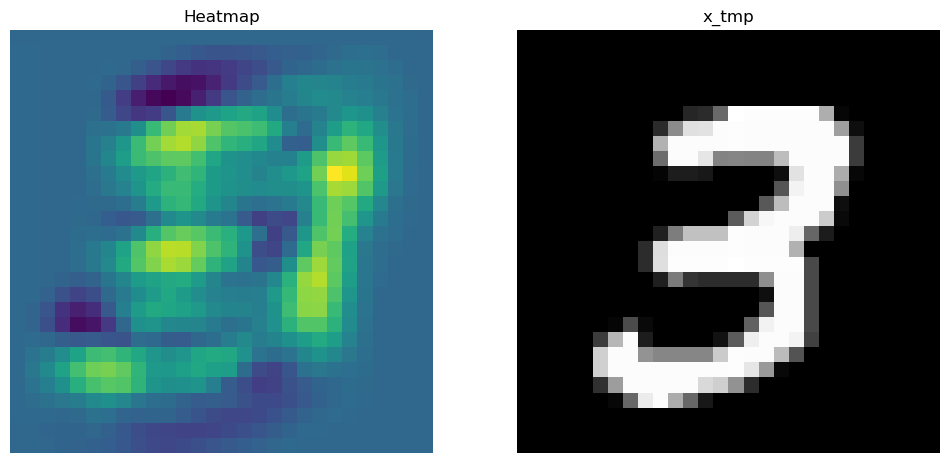

In [53]:
from skimage.metrics import structural_similarity as ssim

# 假设 heat_map 和 x_input1 已经被定义
# heat_map = ...
# x_input1 = ...

x_tmp = np.reshape(x_input1, (28, 28))

# 归一化 heat_map 和 x_tmp 到相同的范围
normalized_heat_map = (heat_map - np.min(heat_map)) / (np.max(heat_map) - np.min(heat_map))
normalized_x_tmp = (x_tmp - np.min(x_tmp)) / (np.max(x_tmp) - np.min(x_tmp))

# 计算结构相似性指数 (SSIM)
ssim_index = ssim(normalized_heat_map, normalized_x_tmp)
print("SSIM index between heat_map and x_tmp: {:.4f}".format(ssim_index))

# 绘制 heat_map 和 x_tmp 并排展示
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.imshow(normalized_heat_map, cmap='viridis')
ax1.set_title("Heatmap")
ax1.axis('off')

ax2.imshow(normalized_x_tmp, cmap='gray')
ax2.set_title("x_tmp")
ax2.axis('off')

plt.show()


[[ 8.26864780e-01  6.94538934e-01  2.76732315e-01  2.76732315e-01
   2.76732315e-01  2.76732315e-01  2.76732315e-01  2.76732315e-01
   2.76732315e-01  2.76732315e-01  2.76732315e-01  2.76732315e-01
   2.76732315e-01  2.76732315e-01  2.76732315e-01  2.76732315e-01
   2.76732315e-01  2.76732315e-01  2.76732315e-01  2.76732315e-01
   2.76732315e-01  2.76732315e-01  2.76732315e-01  2.76732315e-01
   2.76732315e-01  2.76732315e-01 -7.82329976e-02 -5.76457629e-01]
 [ 1.18168281e+00  1.06773083e+00  5.44254939e-01  5.44254939e-01
   5.44254939e-01  5.44254939e-01  5.44254939e-01  3.53519017e-01
   3.08755962e-01  1.91740662e-01 -2.88998668e+00 -6.30887441e+00
  -1.06383855e+01 -1.31163064e+01 -1.31408840e+01 -1.17087796e+01
  -9.65378933e+00 -6.39016879e+00 -5.07576105e+00 -4.13393145e+00
  -1.25289382e+00  2.24047649e+00  4.93289611e+00  5.39978804e+00
   3.88365147e+00  6.93083218e-01  2.27635786e-01 -4.13138893e-01]
 [ 1.24399493e+00  1.16013572e+00  5.28428728e-01  5.28428728e-01
   5.284

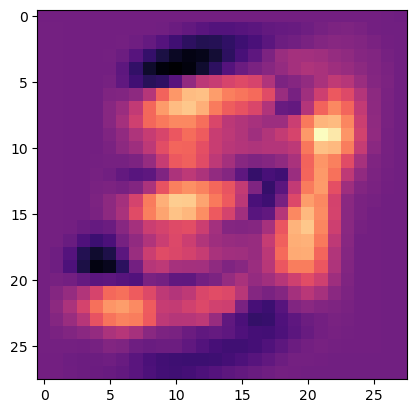

In [25]:

# 使用magma色彩映射将矩阵绘制为图像
fig, ax = plt.subplots()
image = ax.imshow(heat_map, cmap='magma')

# 从图像中获取像素值矩阵
pixel_values = image.get_array()
print(pixel_values)

In [26]:
pixel_values.shape

(28, 28)

In [27]:
pixel_values

masked_array(
  data=[[ 8.26864780e-01,  6.94538934e-01,  2.76732315e-01,
          2.76732315e-01,  2.76732315e-01,  2.76732315e-01,
          2.76732315e-01,  2.76732315e-01,  2.76732315e-01,
          2.76732315e-01,  2.76732315e-01,  2.76732315e-01,
          2.76732315e-01,  2.76732315e-01,  2.76732315e-01,
          2.76732315e-01,  2.76732315e-01,  2.76732315e-01,
          2.76732315e-01,  2.76732315e-01,  2.76732315e-01,
          2.76732315e-01,  2.76732315e-01,  2.76732315e-01,
          2.76732315e-01,  2.76732315e-01, -7.82329976e-02,
         -5.76457629e-01],
        [ 1.18168281e+00,  1.06773083e+00,  5.44254939e-01,
          5.44254939e-01,  5.44254939e-01,  5.44254939e-01,
          5.44254939e-01,  3.53519017e-01,  3.08755962e-01,
          1.91740662e-01, -2.88998668e+00, -6.30887441e+00,
         -1.06383855e+01, -1.31163064e+01, -1.31408840e+01,
         -1.17087796e+01, -9.65378933e+00, -6.39016879e+00,
         -5.07576105e+00, -4.13393145e+00, -1.25289382e+00,

In [28]:
matrix = pixel_values
multiplier = 0.91016775

new_matrix = [x * multiplier for x in matrix]
new_matrix=np.array(new_matrix)

print(new_matrix)


[[ 7.52585656e-01  6.32146938e-01  2.51872828e-01  2.51872828e-01
   2.51872828e-01  2.51872828e-01  2.51872828e-01  2.51872828e-01
   2.51872828e-01  2.51872828e-01  2.51872828e-01  2.51872828e-01
   2.51872828e-01  2.51872828e-01  2.51872828e-01  2.51872828e-01
   2.51872828e-01  2.51872828e-01  2.51872828e-01  2.51872828e-01
   2.51872828e-01  2.51872828e-01  2.51872828e-01  2.51872828e-01
   2.51872828e-01  2.51872828e-01 -7.12051514e-02 -5.24673143e-01]
 [ 1.07552958e+00  9.71814169e-01  4.95363293e-01  4.95363293e-01
   4.95363293e-01  4.95363293e-01  4.95363293e-01  3.21761608e-01
   2.81019719e-01  1.74516167e-01 -2.63037267e+00 -5.74213403e+00
  -9.68271538e+00 -1.19380391e+01 -1.19604088e+01 -1.06569536e+01
  -8.78656771e+00 -5.81612555e+00 -4.61979402e+00 -3.76257108e+00
  -1.14034355e+00  2.03920944e+00  4.48976295e+00  4.91471293e+00
   3.53477432e+00  6.30821993e-01  2.07186751e-01 -3.76025696e-01]
 [ 1.13224406e+00  1.05591811e+00  4.80958786e-01  4.80958786e-01
   4.809

In [29]:
new_matrix=new_matrix.reshape(1, 784)

In [30]:
new_matrix.shape

(1, 784)

In [31]:
df = pd.DataFrame(new_matrix)

In [32]:
df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.752586,0.632147,0.251873,0.251873,0.251873,0.251873,0.251873,0.251873,0.251873,0.251873,...,0.889489,0.446772,-0.002382,-0.002382,-0.002382,-0.002382,-0.002382,-0.002382,-0.040052,-0.329347


In [33]:
data1 = pd.read_csv('C:/Users/User/Desktop/demo.csv')

In [34]:
data1

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,-0.306087,-0.458025,-0.671932,-0.671932,-0.671932,-0.671932,-0.671932,-0.671932,-0.671932,-0.671932,...,-0.362326,-0.598868,-0.719555,-0.719555,-0.719555,-0.719555,-0.719555,-0.719555,-0.680736,-0.591322
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.382547,0.204194,0.151032,0.151032,0.151032,0.151032,0.151032,0.151032,0.066120,0.012948
2,-0.096959,-0.123375,-0.150673,-0.150673,-0.150673,-0.150673,-0.150673,-0.150673,-0.150673,-0.150673,...,-0.195337,-0.162862,-0.156398,-0.156398,-0.156398,-0.156398,-0.156398,-0.156398,-0.125272,-0.097656
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.480303,-0.258908,-0.195285,-0.195285,-0.195285,-0.195285,-0.195285,-0.195285,-0.130821,-0.074757
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.915402,0.476340,0.355852,0.355852,0.355852,0.355852,0.355852,0.355852,0.293058,0.201642
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.041197,0.703043
8,1.104276,1.478439,1.844672,1.844672,1.844672,1.844672,1.844672,1.844672,1.844672,1.844672,...,0.000000,0.117451,0.311072,0.311072,0.311072,0.311072,0.311072,0.311072,0.169562,0.026245
9,0.022809,0.187349,0.379382,0.379382,0.379382,0.379382,0.379382,0.379382,0.379382,0.379382,...,0.035715,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033666


In [35]:
summed_data = data1.sum(axis=0)

In [36]:
total_sum = data1.sum().sum()

print("表格中所有数据的总和：", total_sum)

表格中所有数据的总和： 9769.32688007


In [37]:
sorted_summed_data = summed_data.sort_values()

In [38]:
sorted_summed_data

122    -68.160606
123    -67.583632
536    -65.183916
124    -64.915366
121    -63.382844
          ...    
329    151.166130
467    152.793037
301    156.600367
274    162.552282
273    165.830074
Length: 784, dtype: float64

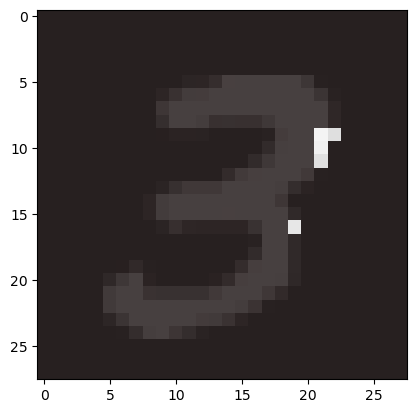

In [39]:
import matplotlib.pyplot as plt
import numpy as np

indices = [273,274,301,467,329]
image_width = 28

def index_to_coordinates(index, width):
    row = index // width
    col = index % width
    return (row, col)

coordinates = [index_to_coordinates(index, image_width) for index in indices]

index = 7
img = np.reshape(x_Train4D_normalize[index], (28, 28))

heatmap = np.zeros((28, 28))
for coord in coordinates:
    heatmap[coord[0], coord[1]] = 1

plt.imshow(img, cmap='gray', alpha=0.5)
plt.imshow(heatmap, cmap='hot', alpha=0.75, interpolation='nearest')
plt.show()


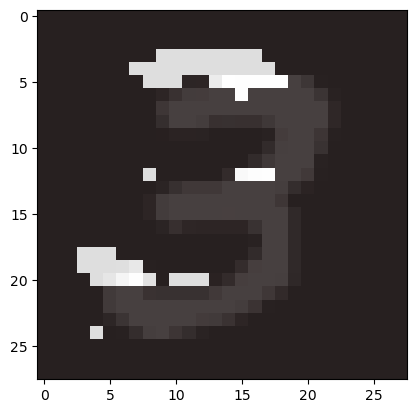

In [40]:
import matplotlib.pyplot as plt
import numpy as np

indices = [122, 123, 536, 124, 121, 537, 125, 126, 127, 538,
       120, 128, 508, 353, 129, 535, 352, 95, 96, 539,
       94, 567, 507, 97, 149, 158, 98, 148, 157, 99, 93,
       566, 150, 509, 156, 568, 119, 565, 570, 571, 100,
       153, 155, 676, 154, 351, 564, 344, 183, 572]
image_width = 28

def index_to_coordinates(index, width):
    row = index // width
    col = index % width
    return (row, col)

coordinates = [index_to_coordinates(index, image_width) for index in indices]

index = 7
img = np.reshape(x_Train4D_normalize[index], (28, 28))

heatmap = np.zeros((28, 28))
for coord in coordinates:
    heatmap[coord[0], coord[1]] = 1

plt.imshow(img, cmap='gray', alpha=0.5)
plt.imshow(heatmap, cmap='hot', alpha=0.75, interpolation='nearest')
plt.show()


In [41]:
sorted_indices = summed_data.sort_values().index

In [42]:
top_50_indices = sorted_indices[:50]

In [43]:
top_50_indices

Index(['122', '123', '536', '124', '121', '537', '125', '126', '127', '538',
       '120', '128', '508', '353', '129', '535', '352', '95', '96', '539',
       '94', '567', '507', '97', '149', '158', '98', '148', '157', '99', '93',
       '566', '150', '509', '156', '568', '119', '565', '570', '571', '100',
       '153', '155', '676', '154', '351', '564', '344', '183', '572'],
      dtype='object')

In [44]:
bottom_50_indices= sorted_indices[-50:]

In [45]:
bottom_50_indices

Index(['580', '410', '299', '497', '578', '219', '303', '327', '217', '579',
       '550', '358', '469', '552', '441', '522', '438', '247', '413', '494',
       '275', '218', '411', '466', '551', '244', '330', '384', '524', '385',
       '356', '496', '523', '412', '245', '246', '357', '439', '328', '300',
       '302', '495', '440', '468', '272', '329', '467', '301', '274', '273'],
      dtype='object')

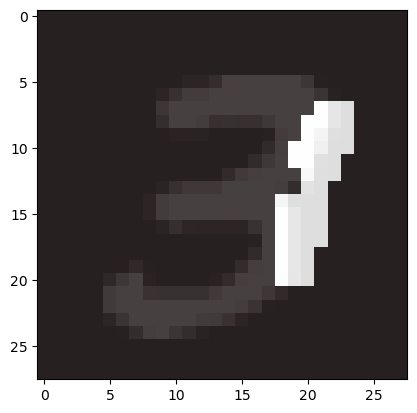

In [46]:
import matplotlib.pyplot as plt
import numpy as np

indices = [580, 410, 299, 497, 578, 219, 303, 327, 217, 579,
       550, 358, 469, 552, 441, 522, 438, 247, 413, 494,
       275, 218, 411, 466, 551, 244, 330, 384, 524, 385,
       356, 496, 523, 412, 245, 246, 357, 439, 328, 300,
       302, 495, 440, 468, 272, 329, 467, 301, 274, 273]
image_width = 28

def index_to_coordinates(index, width):
    row = index // width
    col = index % width
    return (row, col)

coordinates = [index_to_coordinates(index, image_width) for index in indices]

index = 7
img = np.reshape(x_Train4D_normalize[index], (28, 28))

heatmap = np.zeros((28, 28))
for coord in coordinates:
    heatmap[coord[0], coord[1]] = 1

plt.imshow(img, cmap='gray', alpha=0.5)
plt.imshow(heatmap, cmap='hot', alpha=0.75, interpolation='nearest')
plt.show()